In [1]:
import shapes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

let's create data some random data

In [2]:
x=np.random.normal(1, 0.5, 1000)
y=x**2+np.random.normal(1, 0.5, 1000)

now create a box around that data by fitting a line to the data 

In [3]:
b=shapes.Box()
b.data=np.array([x, y])

In [4]:
print ('vertices: {} '.format(np.round(b.vertices, 1)))
print ('length : {}'.format(len(b)))
print ('angle : {}'.format(b.angle))
print ('completeness: {}'.format(b.efficiency))
print ('scatter: {}'.format(b.scatter))
print ('coefficients: {}'.format(b.coeffs))

vertices: [[-0.6  0.2]
 [ 2.5  5.9]
 [ 2.5  4. ]
 [-0.6 -1.7]
 [-0.6  0.2]] 
length : 1000
angle : 1.078494539578629
completeness: 0.879
scatter: 0.9444712132525918
coefficients: [ 1.86445961  0.34682022]


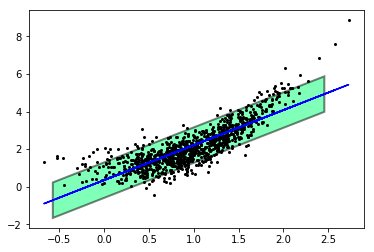

In [5]:
fig, ax=plt.subplots()
b.alpha=0.5
b.color="#01FF70"
b.plot(ax=ax, only_shape=False, size=4)
line=np.poly1d(b.coeffs)
plt.plot(x, line(x), 'b')

selection

(2, 879) (879, 2)


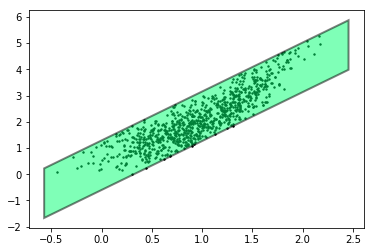

In [6]:
#with an array
s1=b.select(b.data)
#with a pandas datafrane
d=pd.DataFrame([x, y]).transpose()
s2=b.select(d)
print (s1.shape, s2.shape)
fig, ax=plt.subplots()
b.plot(ax=ax)
ax.scatter(s1[0], s1[1], c='k', s=2)

Checking points in the box

In [7]:
b.contains([(0, 3), (0.5, 1)])

[False, True]

Rotations

In [8]:
import copy
b2=copy.deepcopy(b)
b2.rotate(np.pi/2)
b2.color="#B10DC9"
b3=copy.deepcopy(b)
b3.color='#FF4136'
b3.rotate(np.pi/2-b.angle)

angles 1.078494539578629 0.4923017872162677
reminder : axes scales are not the same


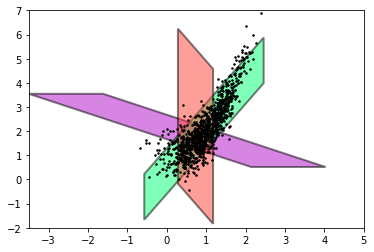

In [9]:
fig, ax=plt.subplots()
ax.set_xlim([-3.5, 5.0])
ax.set_ylim(-2, 7.0)
b2.plot()
b.plot(only_shape=False, size=3)
b3.plot()
print ('angles {} {}'.format(b.angle, b2.angle))
print ('reminder : axes scales are not the same')